## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


### Find no.of samples are there in training and test datasets

In [2]:
#Printing number of samples in Training dataset
print("No. of samples in Training dataset is",x_train.shape[0])

No. of samples in Training dataset is 60000


In [3]:
#Printing number of samples in Test dataset
print("No. of samples in Test dataset is",x_test.shape[0])

No. of samples in Test dataset is 10000


### Find dimensions of an image in the dataset

In [4]:
#Printing dimensions of an image in dataset
print("Dimensions of an image in the dataset is",x_train.shape[2],"x",x_train.shape[1])

Dimensions of an image in the dataset is 28 x 28


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
#Importing tensorflow library
import tensorflow as tf

In [0]:
#Converting train & test labels to one hot vectors
trainY = tf.keras.utils.to_categorical(y_train)
testY = tf.keras.utils.to_categorical(y_test)

In [7]:
#Verifying top 10 records of trainY
trainY[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
#Verifying top 10 records of testY
testY[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
#Define early stopping with patience=5
es = tf.keras.callbacks.EarlyStopping(patience=5)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#Reshape data from 2D (28,28) to 3D (28, 28, 1)
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
#Normalizing both training & test image data
x_train = x_train / 255
x_test = x_test / 255

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Clear session
tf.keras.backend.clear_session()

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Add Conv Layer with 32 3x3 filters & relu activation
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add another Conv Layer with 32 3x3 filters & relu activation
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

#Add Flattening layer
model.add(tf.keras.layers.Flatten())

#Add fully connected layer with 128 neurons with relu activation
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Add fully connected layer with 10 neurons with softmax activation
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compile the model using categorical_crossentropy Loss and adam Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#Fit the model
model.fit(x_train, trainY, epochs=10, callbacks=[es], validation_data=(x_test,testY))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.3916 - acc: 0.8587 - val_loss: 0.2771 - val_acc: 0.8989
Epoch 2/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2583 - acc: 0.9042 - val_loss: 0.2406 - val_acc: 0.9097
Epoch 3/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.2100 - acc: 0.9218 - val_loss: 0.2328 - val_acc: 0.9143
Epoch 4/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1771 - acc: 0.9330 - val_loss: 0.2303 - val_acc: 0.9184
Epoch 5/10
60000/60000 [==============================] - 7s 114us/sample - loss: 0.1507 - acc: 0.9431 - val_loss: 0.2221 - val_acc: 0.9194
Epoch 6/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.1278 - acc: 0.9528 - val_loss: 0.2207 - val_acc: 0.9244
Epoch 7/10
60000/60000 [=====

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
#ImageDataGenerator declaration
datagen= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True)

#Fitting the training images
train_gen = datagen.flow(x_train, trainY)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

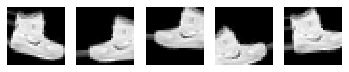

In [15]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [16]:
#Using fit_generator
model.fit_generator(train_gen,
                    epochs=10,
                    validation_data=(x_test,testY),
                    callbacks = [es])

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7661 - acc: 0.7164 - val_loss: 0.3797 - val_acc: 0.8600
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5662 - acc: 0.7892 - val_loss: 0.3804 - val_acc: 0.8601
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5142 - acc: 0.8099 - val_loss: 0.3520 - val_acc: 0.8715
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4787 - acc: 0.8222 - val_loss: 0.3431 - val_acc: 0.8776
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4587 - acc: 0.8306 - val_loss: 0.3475 - val_acc: 0.8786
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4428 - acc: 0.8355 - val_loss: 0.3408 - val_acc: 0.8788
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4340 - acc: 0.8388 - val_loss: 0.3531 - val_acc: 0.8744
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [0]:
#Train accuracy is 85.22% & validation accuracy is 87.67%

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
#We already have necessary libraries for Data augmentation imported

### **Load CIFAR10 dataset**

In [0]:
#Loading cifar10 Dataset
from keras.datasets import cifar10
(c10_x_train, c10_y_train), (c10_x_test, c10_y_test) = cifar10.load_data()

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
#ImageDataGenerator declaration
c10_datagen= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True)

### **Prepare/fit the generator.**

In [0]:
#Fitting the training images
c10_train_gen = c10_datagen.flow(c10_x_train, c10_y_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

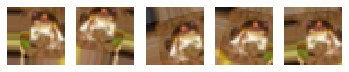

In [22]:
#Generating 5 images for 1 of the image
c10_gen = c10_datagen.flow(c10_x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(c10_gen.next().squeeze().astype(int))
    plt.plot()
plt.show()